# Simulations for prey-predator models with exogenous mortality source

This notebook aims to be easily executable, by entring the parameters once for all, for the pulsed Schaefer model. If we want to see other conditions, we only need to change the parameters at the top of the notebook.

In [4]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import exo
importlib.reload(exo)

Logistic growth
Logistic growth


<module 'exo' from 'c:\\Users\\ainat\\Internship_CACOLAC\\sim_models\\First_sim_CACOLAC\\exo.py'>

In [37]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 
a = 0.1
c = 1
m = 0.1
gamma = 0.8
b = 0.5
q = 0.1

E = 0.1
T = 1

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

In [38]:
#Other initial values but the periodic solution
x0_a = 5 
y0_a = 1
x0y0_a = [x0_a, y0_a]

x0_b = 7.5
y0_b = 2
x0y0_b = [x0_b, y0_b]

x0_c = 10
y0_c = 3
x0y0_c = [x0_c, y0_c]

## 1. The most basic Lotka-Volterra model

The model:  
\begin{cases}
\dot{x} = rx - axy\\ 
\dot{y} = \gamma a x y - my\\
x(nT^{+}) = x(nT) - Ex(nT)
\end{cases}

Periodic solutions (to be calculated)

Solve the ODE with other initial values but the periodic solution

In [39]:
xy_a = exo.solve_basic_lv_model(xy=x0y0_a, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]

xy_b = exo.solve_basic_lv_model(xy=x0y0_b, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_b = xy_b[0]
y_b = xy_b[1]

xy_c = exo.solve_basic_lv_model(xy=x0y0_c, t=tt, r=r, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_c = xy_c[0]
y_c = xy_c[1]

#time points
t = xy_a[2]

Plot results

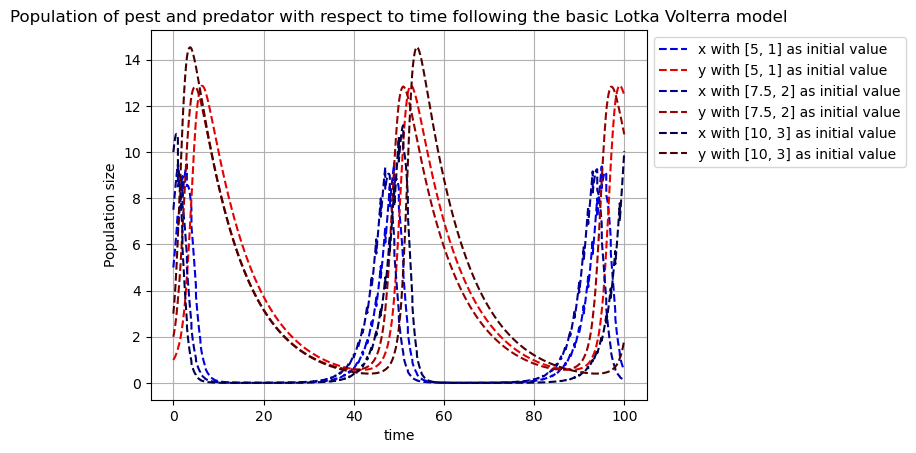

In [40]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the basic Lotka Volterra model')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Some notes about the parameters.  
If $E$ is too small and $x$ is already near $0$, the graphs on the plot seem to be continuous.  
To avoid $x$ to decrease too fast, the search rate $a$ should be small because this model doesn't have an half-saturation constant.

## 2. Lotka-Volterra model with logistic growth

The model:  
\begin{cases}
\dot{x} = rx (1 - \frac{x}{K})- axy\\ 
\dot{y} = \gamma a x y - my\\
x(nT^{+}) = x(nT) - Ex(nT)
\end{cases}

Periodic solutions (to be calculated)

Solve the ODE with other initial values but the periodic solution

In [41]:
xy_a = exo.solve_logistic_lv_model(xy=x0y0_a, t=tt, r=r, K=K, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]

xy_b = exo.solve_logistic_lv_model(xy=x0y0_b, t=tt, r=r, K=K, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_b = xy_b[0]
y_b = xy_b[1]

xy_c = exo.solve_logistic_lv_model(xy=x0y0_c, t=tt, r=r, K=K, a=a, gamma=gamma, m=m, E=E, T=T, t_0=t_0, t_n=t_n)
x_c = xy_c[0]
y_c = xy_c[1]

#time points
t = xy_a[2]

Plot results

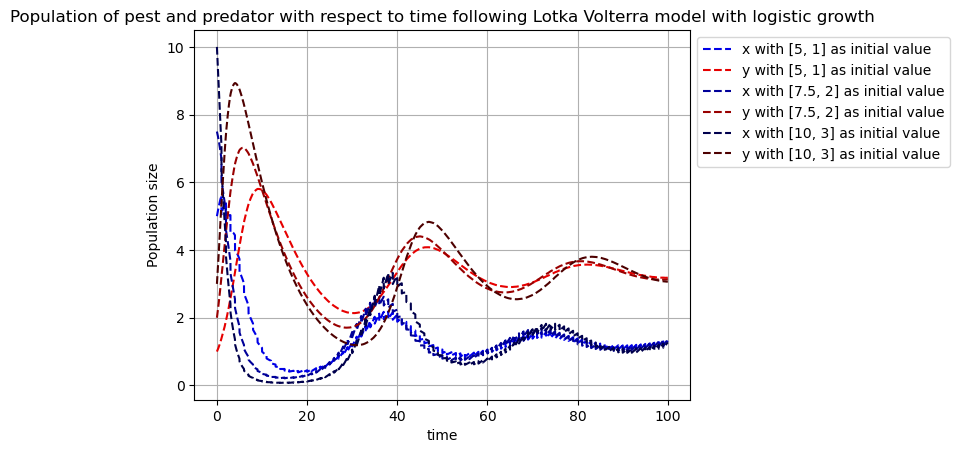

In [42]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 3. Test the general model when we decide the functions

In general, all predator-prey have this form:
The model:  
\begin{cases}
\dot{x} = g(x,y)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - Eh(x(nT))
\end{cases}  
The function ```solve_predator_prey_model``` takes those functions as argument to allow us to decide our own model without limit.  
The given functions must have ```x``` and ```y``` as two first arguments even if they are not used. The other arguments are given by the respective ```kwargs``` that maybe an empty dictionnary.  
```func_g``` is $g$, ```func_f```  is $f$, ```func_m``` is $m$;

We test first the two models above to verify that we've got the same results.

### 3.1 Test the basic Lotka-Volterra model

In this model:
\begin{align*}
g(x,y) &= r\\ 
f(x,y) &= ax\\ 
m(x,y) &= m\\
h(x,y) &= x
\end{align*}

```func_g``` is ```identity``` applied to ```r```  
```func_f``` is ```multiply``` applied to ```a```  
```func_g``` is ```identity``` applied to ```m```  
```func_g``` is ```return_x``` 

Solve the ODE with other initial values but the periodic solution

In [43]:
#x and y points for different initial values
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.identity,
        kwargs_g={'z': r},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.identity,
        kwargs_g={'z': r},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.identity,
        kwargs_g={'z': r},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

Plot results

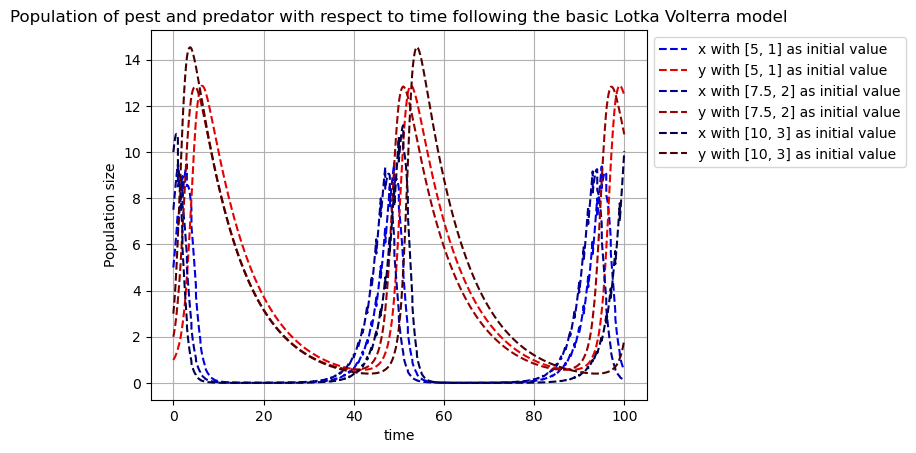

In [44]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the basic Lotka Volterra model')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

It gives the same result as the basic Lotka-Volterra model

### 3.2 Test Lotka-Volterra model with logistic growth

In this model:
\begin{align*}
g(x,y) &= r(1 - \frac{x}{K})\\ 
f(x,y) &= ax\\ 
m(x,y) &= m\\
h(x,y) &= x
\end{align*}

```func_g``` is ```logistic model``` applied to ```r``` and ```K```  
```func_f``` is ```multiply``` applied to ```a```  
```func_g``` is ```identity``` applied to ```m```  
```func_g``` is ```return_x``` 

Solve the ODE with other initial values but the periodic solution

In [45]:
#x and y points for different initial values
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

Plot results

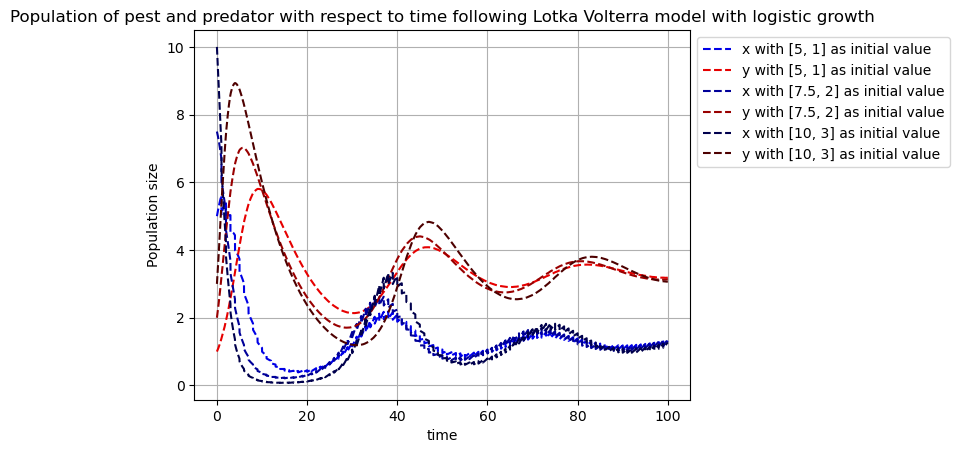

In [46]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following Lotka Volterra model with logistic growth')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

It gives the same result

## 4 Choosing the model using the general model

This section will show the 3 models in Nundoll et al defined with the general model.  
All the functions can be changed if we want. We are not limited. We can even define other functions.  
Reminder, the basic ```func_h``` are  ```return_x``` for an harvesting of $Eh(x(nT))$,  
 ```return_one``` for an harvesting of $E$  
 and ```return_zero``` for no harvesting.  
This reminder is if we want to change the harvesting

### 4.1 No-interaction model

Solve ODE for other initial values but the periodic solution

In [47]:
#x and y points for different initial values
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

Plot results

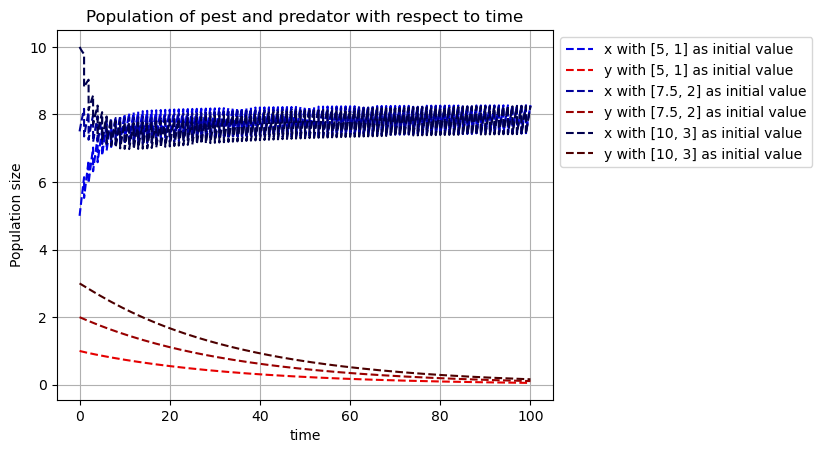

In [48]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 4.2 Beddington-DeAngelis model

Solve ODE for other initial values but the periodic solution

In [49]:
#x and y points for different initial values
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.bda_f,
        kwargs_f={'a': a, 'c': c, 'b': b}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.bda_f,
        kwargs_f={'a': a, 'c': c, 'b': b}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.bda_f,
        kwargs_f={'a': a, 'c': c, 'b': b}, 
        func_m=exo.identity,
        kwargs_m={'z': m},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

Plot results

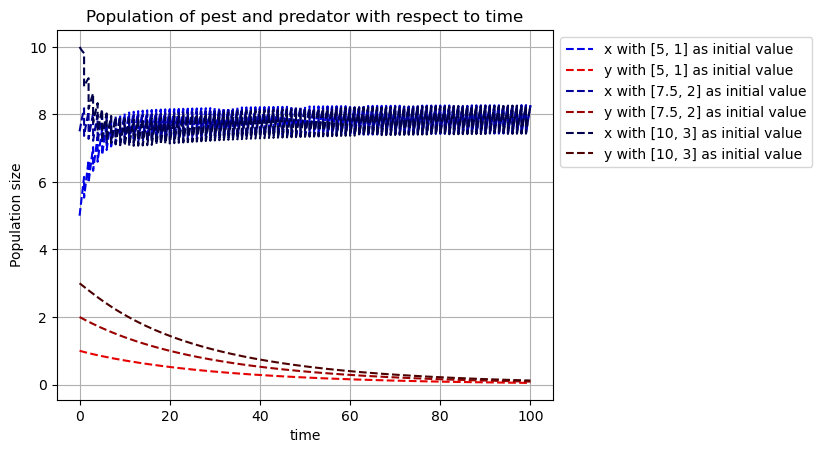

In [50]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 4.3 Squabbling model

Solve ODE for other initial values but the periodic solution

In [51]:
#x and y points for different initial values
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.squabbling_m,
        kwargs_m={'m': m, 'q': q},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]


xy_b = exo.solve_predator_prey_model(
        xy=x0y0_b,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.squabbling_m,
        kwargs_m={'m': m, 'q': q},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_b = xy_b[0]
y_b = xy_b[1]


xy_c = exo.solve_predator_prey_model(
        xy=x0y0_c,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.squabbling_m,
        kwargs_m={'m': m, 'q': q},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n 
        )
x_c = xy_c[0]
y_c = xy_c[1]



#time points
t = xy_a[2]

Plot results

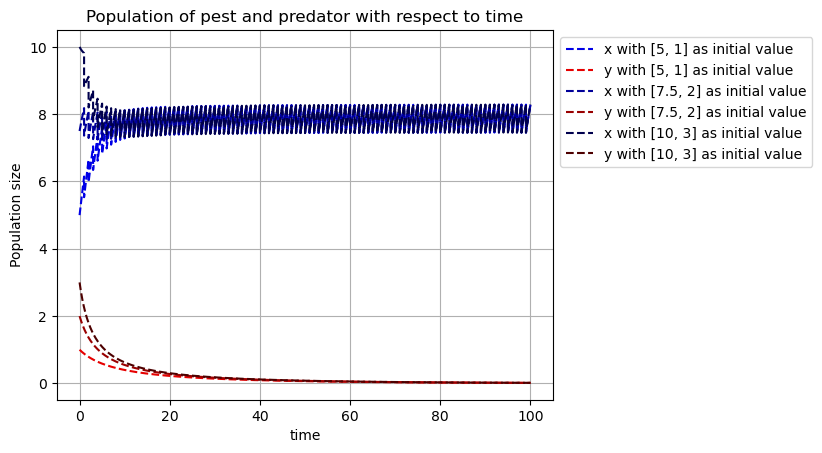

In [52]:
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a} as initial value')
plt.plot(t, x_b, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_b} as initial value')
plt.plot(t, y_b, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_b} as initial value')
plt.plot(t, x_c, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_c} as initial value')
plt.plot(t, y_c, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_c} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

### 4.4 Other models

In [53]:
xy_a = exo.solve_predator_prey_model(
        xy=x0y0_a,
        t=t,
        gamma=gamma,
        E=E,
        T=T,
        func_g=exo.logistic_model,
        kwargs_g={'r': r, 'K': K},
        func_f=exo.no_int_f,
        kwargs_f={'a': a, 'c': c}, 
        func_m=exo.squabbling_m,
        kwargs_m={'m': m, 'q': q},
        func_h=exo.return_x,
        kwargs_h={},
        t_0=t_0,
        t_n=t_n  
        )
x_a = xy_a[0]
y_a = xy_a[1]